In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [30]:
df = pd.read_csv('Raw/Final.csv')

In [31]:
df =pd.read_csv('Raw/Final.csv')
df.drop(columns=['Name', 'SpokenLanguages', 'Location'], inplace=True) # drop non-numeric column
df.Origin = df.Origin.map({'Bangkok': 0,'Phuket': 1,'Koh Samui': 2,'Ko Pha-ngan': 3,'Ko Phi Phi': 4})


# kNN

In [32]:
# features split
X = df.drop(columns=["Sparkling clean"])
y = df["Sparkling clean"]

In [33]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [34]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [35]:
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier with your scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions using the trained classifier and scaled test data
y_pred = knn.predict(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier with your scaled training data
knn.fit(X_train_scaled, y_train)


C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(n_neighbors=10)

In [36]:
# score
accuracy_score(y_test, y_pred)

0.9004149377593361

C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

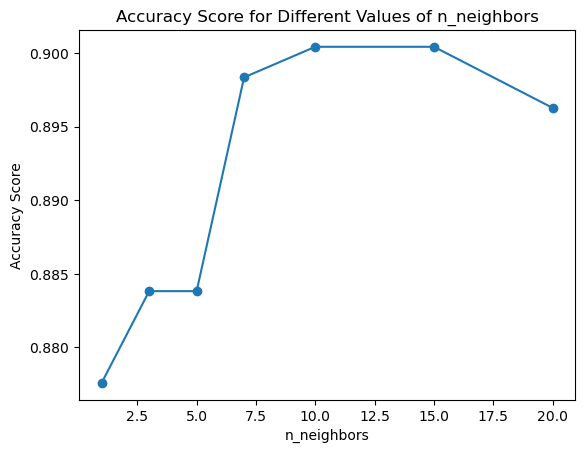

In [37]:

# Define different values of n_neighbors to try
n_neighbors_values = [1, 3, 5, 7, 10, 15, 20]

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create and train the classifier with the scaled training data
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions using the trained classifier and scaled test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy score and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of n_neighbors')
plt.show()

# LogisticRegression

In [38]:
# features split
X = df.drop(columns=["Sparkling clean"])
y = df["Sparkling clean"]

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [40]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# train & predict
model = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [42]:
# score
accuracy_score(y_test, y_pred)


0.950207468879668

# LInearRegression

In [43]:
# features split
X = df[['Real Guest Cleanlines Score', 'Real Guest Facilities Score', 'Real Guest Location Score',
       'Real Guest Service Score', 'Real Guest Value for money Score', 'Price', 'Reviews', 'Booked today', 'Stars',
       'Free WiFi In All Rooms', 'Coffee',"ExcellentView", 'Free WiFi In All Rooms']]
y = df.Score

In [44]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)



In [45]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# train & predict
model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [47]:
# score
r2_score(y_test, y_pred)

0.8335392600559017

# Draft

In [20]:
#model.predict([[8,3,0,5,5,10,9,10,5,5,5,8]])

In [21]:
ts_list = []
rs_list = []
r2_list = []
for i in range(1, 10):
    ts = i / 10
    for rs in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model = LinearRegression().fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
#         r2_score(y_test, y_pred)
        ts_list.append(ts)
        rs_list.append(rs)
        r2_list.append(r2_score(y_test, y_pred))

In [ ]:
import plotly.graph_objects as go
x = ts_list
y = rs_list
z = r2_list
figC = go.Figure(data=[go.Scatter3d(x=x,
                                   y=y,
                                   z=z,
                                   mode='markers',
                                   marker={'size':12,
                                           'color':z,
                                           'colorscale':'Viridis',
                                           'opacity':0.8})],
                layout=go.Layout(margin={'l':0,
                                         'r':0,
                                         'b':0,
                                         't':0}))
figC.show()

SyntaxError: invalid syntax (3601725249.py, line 1)